In [1]:
.libPaths()
library(tidyverse)
library(Seurat)
library(patchwork)

theme_set( theme_bw() )

root.dir <- here::here( "./" )
data.dir <- "../GEO/GSE167422/"

"%ni%" <- Negate("%in%")

sessionInfo()

[1] "/home/cl266/R_4.2.1"                     
[2] "/n/app/R/4.2.1-gcc-9.2.0/lib64/R/library"

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject



R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /n/app/openblas/0.3.19-gcc-9.2.0/lib/libopenblas_haswellp-r0.3.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.1.2    SeuratObject_4.1.3 Seurat_4.3.0       lubridate_1.9.2   
 [5] forcats_1.0.0      stringr_1.5.0      dplyr_1.1.1        purrr_1.0.1       
 [9] readr_2.1.4        tidyr_1.3.0        tibble_3.2.1       ggplot2_3.4.2     
[13] tidyverse_2.0.0   

loaded via a namespace (and not

# Objectives & Background

This is to reproduce the Figure 3 and associated Figure S14.

In [2]:
# Consistent colour scheme for Figure 3 and Figure 4
viridis.color <- viridisLite::viridis(n=6, alpha = 0.7, begin = 0, end = 0.9, direction = 1, option = "C")

cluster.color <- c(
    "3" = viridis.color[1],
    "6" = viridis.color[2],
    "1" = viridis.color[3],
    "2" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
    "5" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
    "4" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
)

figure5a_theme <-
theme(
  axis.ticks   = element_blank(),
  axis.text    = element_blank(),
  panel.grid   = element_blank(),
  panel.border = element_blank(),
  axis.line    = element_line(),
  legend.title = element_blank(),
  legend.position = "none"
)

# UMAP axis has no meaning at all, but according to the current convention
axis.data <-
  tibble(
    x    = c(-12, -12, -7),
    y    = c(-5, -10, -10)
  )

# Figure 3


In [3]:
tictoc::tic()
integrated <- readRDS( paste0( data.dir, "20230509_3F_integrated.rds") ) # This is 4F dataset.
tictoc::toc()

308.64 sec elapsed


In [4]:
color.mapping.res.0.2 <-
integrated@meta.data %>%
dplyr::count( cluster.order.0.2, label.0.2 ) %>%
dplyr::select( cluster.order.0.2, label.0.2 ) %>%
deframe()

In [5]:
integrated

An object of class Seurat 
56788 features across 80039 samples within 3 assays 
Active assay: RNA (37615 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

## Figure 3A (left)

In [13]:
integrated$label.0.2 <- factor(
    integrated$label.0.2,
    levels = color.mapping.res.0.2
)

integrated$label.0.2 %>% unique()
integrated$cluster.order.0.2 %>% unique()

color.mapping.res.0.2

cluster.color
cluster.color.label <- cluster.color
names(cluster.color.label) <- color.mapping.res.0.2[names(cluster.color)]
cluster.color.label


[1] NonLF\nLimb Culture (3D)     rLPC/LPC\nLimb Culture (3D) 
[3] NonLF\nStandard Culture (2D) NonLF\nLimb Culture (2D)    
[5] LPC (E9)                     LPC (E10)                   
6 Levels: NonLF\nStandard Culture (2D) ... LPC (E10)

[1] 1 2 3 6 5 4
Levels: 3 6 1 2 5 4

3                              6 
"NonLF\nStandard Culture (2D)"     "NonLF\nLimb Culture (2D)" 
                             1                              2 
    "NonLF\nLimb Culture (3D)"  "rLPC/LPC\nLimb Culture (3D)" 
                             5                              4 
                    "LPC (E9)"                    "LPC (E10)"

3           6           1           2           5           4 
"#0D0887B3" "#6300A7B3" "#A51F99B3" "#35B779B3" "#BBDF27B3" "#27808EB3"

NonLF\nStandard Culture (2D)     NonLF\nLimb Culture (2D) 
                 "#0D0887B3"                  "#6300A7B3" 
    NonLF\nLimb Culture (3D)  rLPC/LPC\nLimb Culture (3D) 
                 "#A51F99B3"                  "#35B779B3" 
                    LPC (E9)                    LPC (E10) 
                 "#BBDF27B3"                  "#27808EB3"

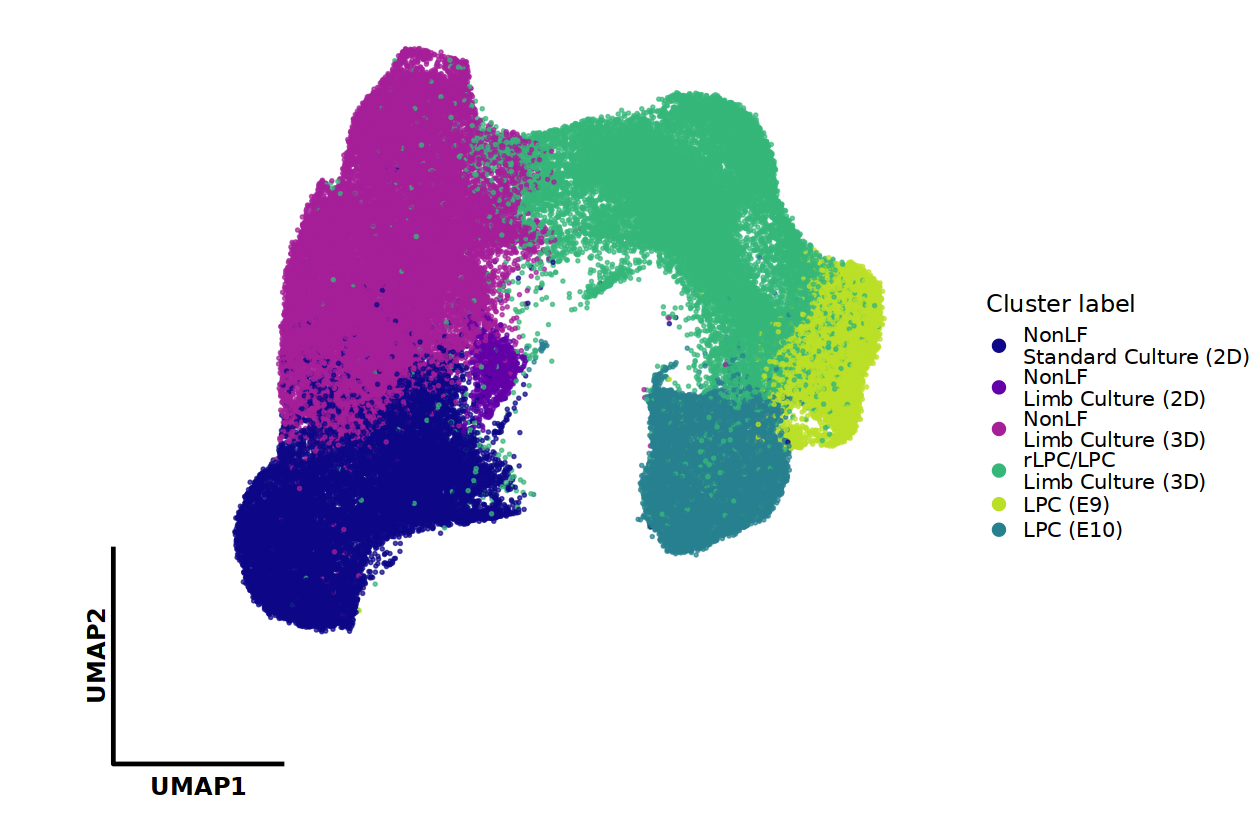

In [14]:
# reorder for visualization

p1 <-
ggplot() +
  geom_point( 
    data=FetchData( integrated, vars = c("UMAP_1", "UMAP_2", "cluster.order.0.2", "label.0.2"  ) )  %>%
            arrange(
                sample(1:n())
#               factor(
#                 cluster.order.0.2,
#                 levels = (cluster.order)
#               )
            ),
#    aes(x = UMAP_1, y = UMAP_2, colour = cluster.order.0.2),
    aes(x = UMAP_1, y = UMAP_2, colour = label.0.2),
    size = 0.5
  ) +
  cowplot::theme_cowplot() +
# Upon reviewer's request
#   ggrepel::geom_label_repel(
#     data=FetchData(
#             integrated,
#             vars = c("UMAP_1", "UMAP_2", "label.0.2" )
#         ) %>%
#         group_by( label.0.2 ) %>%
#         summarize(
#             across(
#                 UMAP_1:UMAP_2,
#                 ~mean(.x)
#             )
#         ),
#     aes( 
#       x = UMAP_1, 
#       y = UMAP_2, 
#       label = label.0.2
#     ),
#     size = 7.5,
#     fontface = "bold",
#     alpha = 0.8
#   ) +
  scale_x_reverse( expand = expansion(0.1, 0)) +
# UMAP axis plot
  geom_line(
    data = axis.data,
    inherit.aes = F,
    aes( x = -x, y = y ),
    size = 1
  ) +
  annotate(
    "text", 
    x = 9.5, 
    y = -10.5, 
    label = "UMAP1", 
    hjust = 0.5, # center justified
    vjust = 0.5, # center justified
    fontface = "bold",
    size = 5
  ) +
  annotate(
    "text", 
    x = 12.5,
    y = -7.5,
    label = "UMAP2", 
    vjust = 0.5, # center justified
    hjust = 0.5, # center justified
    angle = 90,
    fontface = "bold",
    size = 5
  ) +
#  scale_colour_viridis_d( option = "C", end = 0.9 ) +
#   scale_colour_manual( 
#     values= cluster.color
#   ) +  
  scale_colour_manual(
      name = "Cluster label",
#      values = cluster.color  # Upon reviewer's request
      values = cluster.color.label
#           c(
# #           cluster.order   # Somehow scale_colour_manual does not work with a variable!
#             "3" = viridis.color[1],
#             "6" = viridis.color[2],
#             "1" = viridis.color[3],
#             "2" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
#             "5" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
#             "4" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
#           )
  ) +
#   scale_fill_manual( 
#     values= cluster.color
#   ) +  
  guides( colour = guide_legend(override.aes = list(alpha = 1, size = 3))) +
  theme( 
#    legend.position = "none",  # Upon reviewer's request
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    axis.line    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank()
  )

options(repr.plot.width=10.5, repr.plot.height=7)
p1


In [15]:
# ggsave( "./figures/Figure3A(left)_revised.png", plot = p1, width = 10.5, height = 7 )

## Figure 3A (right)

Note that the contour has been assigned with random sampling of ~500 cells that do not contain outliers. To avoid stochasticity, a random sample has been stored in the Seurat object.

### Reference Plot

2.783 sec elapsed


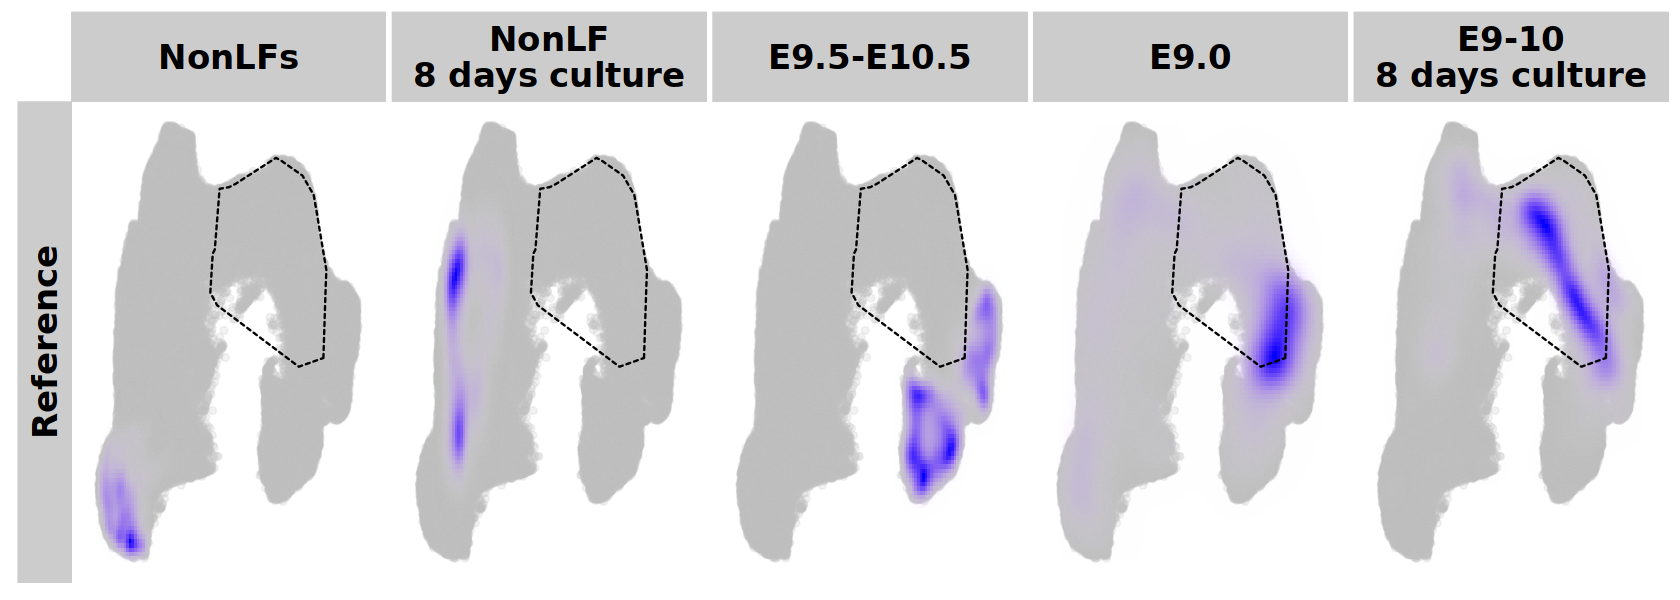

In [16]:
tictoc::tic()
p1.density <-
FetchData( 
    integrated, 
    vars = c(
        "UMAP_1", 
        "UMAP_2",
        "library",
        "free.annotation2",
        "condition3",
        "day3"
    )
) %>% {
#sample_frac(.20) %>% { # Just to reduce the overhead
    ggplot( . ) +
    geom_point( aes( x = UMAP_1, y = UMAP_2 ), alpha = 0.2, colour = "grey" ) +
    stat_density_2d( 
        aes( x = UMAP_1, y = UMAP_2, fill = after_stat(ndensity) ),
        geom = "raster", contour = FALSE, 
        data = . %>% 
            dplyr::filter( 
                condition3 %in% c("0F", "Primary", "cLPC")
            ) %>% 
            mutate( 
                condition4 = case_when(
                    condition3 == "cLPC" & day3 %in% c("08") ~ "E9-10\n8 days culture",
                    condition3 == "Primary" & library == "sample03" ~ "E9.0",
                    condition3 == "Primary" ~ "E9.5-E10.5",
                    free.annotation2 == "NonLFs (3D)"  ~ "NonLF\n8 days culture",
                    condition3 == "0F" & day3 %in% c("00") ~ "NonLFs",
                    TRUE ~ "Other"
                ),
                factors3 = "Reference"
            ) %>%
            dplyr::filter( condition4 != "Other" ) %>%
            mutate(
                condition4 = factor( condition4, levels = c("NonLFs", "NonLF\n8 days culture", "E9.5-E10.5", "E9.0", "E9-10\n8 days culture")),
            )
    ) +
    ggforce::geom_mark_hull( 
#         data=FetchData( 
#                 integrated, 
#                 vars = c("UMAP_1", "UMAP_2", "cluster.order.0.2", "label.0.2"  ) 
#         ) %>% 
#         arrange( sample(1:n()) ) %>% 
#         filter( row_number() <= 200 ),
#         aes( 
#             x = UMAP_1,
#             y = UMAP_2,
#             group = label.0.2, 
#             filter = cluster.order.0.2 == 2 & UMAP_1 > -8 & UMAP_1 < 0.5 & UMAP_2 > -1,
#             label = label.0.2
#         ),
        data=FetchData( 
                integrated, 
                vars = c("UMAP_1", "UMAP_2", "contour", "label.0.2" )
        ) %>% dplyr::filter( contour ),
        aes( 
            x = UMAP_1,
            y = UMAP_2,
            group = label.0.2, 
            filter = contour,
#            label = label.0.2
        ),
        
        expand = 0.01,
        radius = 0,
        concavity = 5,
        label.buffer = unit(0.2, 'in'),
        linetype = "dashed"
    ) +
    cowplot::theme_cowplot() +
    facet_wrap( condition4 ~ . ) +
    scale_fill_gradient(low = "transparent", high = "blue") +
    scale_x_reverse( expand = expansion(0.1, 0) ) +
    lemon::facet_rep_grid( factors3 ~ condition4 , switch="y") +
    figure5a_theme +
    theme( 
    legend.position = "none",
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    axis.line    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    panel.spacing = unit(0, "lines"),
    legend.text  = element_text( size = 20, face = "bold" ),
    legend.text.align = 0.5,
    strip.text.y.left = element_text(angle = 90, size = 20, face="bold", margin = margin(0.25,0.25,0.25,0.25, "cm")),
    strip.text.x.top  = element_text(angle = 0, size = 20, face="bold", margin = margin(0.25,0.25,0.25,0.25, "cm"))
    )
}
tictoc::toc()

options(repr.plot.width=14,  repr.plot.height=5)
p1.density

### Temporal plot



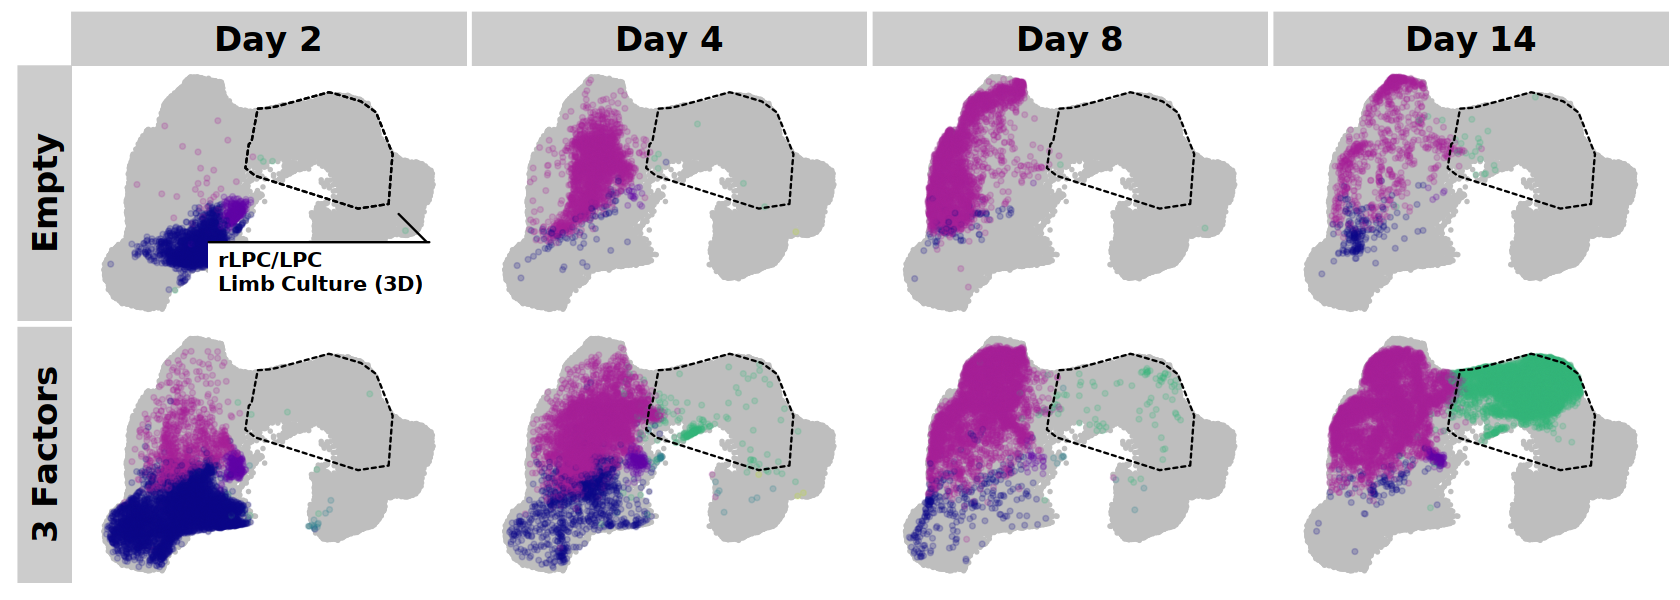

In [17]:
p2 <-
ggplot() +
  geom_point( 
    data=FetchData( integrated, vars = c("UMAP_1", "UMAP_2" ) ),
    aes(x = UMAP_1, y = UMAP_2),
    size = 0.5,
    colour = "grey"
  ) +
  geom_point( 
    data=FetchData( 
            integrated, 
            vars = c("UMAP_1", "UMAP_2", "condition3", "day3", "cluster.order.0.2"  ) 
    ) %>% 
    filter( condition3 %in% c("0F", "3F"), day3 %in% c("02", "04", "08", "14") ) %>%
    mutate( 
        days = factor(paste0( "Day ", as.integer(day3)), levels = c("Day 2", "Day 4", "Day 8", "Day 14") ),
        factors4 = case_when(
            condition3 == "3F" ~ "3 Factors",
            condition3 == "0F" ~ "Empty",
        ),
        factors4 = factor( factors4, levels = c("Empty", "3 Factors"))
    ) %>%
    dplyr::arrange( sample(1:n()) ),
    aes(x = UMAP_1, y = UMAP_2, colour = cluster.order.0.2),
    size = 1,
    alpha = 0.2
  ) +
  ggforce::geom_mark_hull( 
    data=FetchData( 
            integrated, 
            vars = c("UMAP_1", "UMAP_2", "cluster.order.0.2", "label.0.2", "contour"  ) 
    ) %>% filter( contour ),
    aes( 
        x = UMAP_1,
        y = UMAP_2,
        group = label.0.2, 
        filter = cluster.order.0.2 == 2
#        label = label.0.2
    ),
    expand = 0.01,
    radius = 0,
    concavity = 5,
    label.buffer = unit(0.2, 'in'),
    linetype = "dashed"
  ) +
  # just the label
  ggforce::geom_mark_hull( 
    data=FetchData( 
            integrated, 
            vars = c("UMAP_1", "UMAP_2", "cluster.order.0.2", "label.0.2", "contour"  ) 
    ) %>% 
    filter( contour ) %>%  
    mutate(
        factors4 = "Empty",
        factors4 = factor( factors4, levels = c("Empty", "3 Factors")),
        days = "Day 2",
        days = factor( days, levels = c("Day 2", "Day 4", "Day 8", "Day 14"))
    ),
    aes( 
        x = UMAP_1,
        y = UMAP_2,
        group = label.0.2, 
        filter = cluster.order.0.2 == 2,
        label = label.0.2
    ),
    expand = 0.01,
    radius = 0,
    concavity = 5,
    label.buffer = unit(0.2, 'in'),
    linetype = "dashed",
    alpha = 0
  ) +
  cowplot::theme_cowplot() +
  scale_x_reverse( expand = expansion(0.1, 0)) +
  scale_colour_manual(
      values = cluster.color
  ) +
  lemon::facet_rep_grid( factors4 ~ days , switch="y") +
  theme( 
    legend.position = "none",
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    axis.line    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    panel.spacing = unit(0, "lines"),
    legend.text  = element_text( size = 20, face = "bold" ),
    legend.text.align = 0.5,
    strip.text.y.left = element_text(angle = 90, size = 20, face="bold", margin = margin(0.25,0.25,0.25,0.25, "cm")),
    strip.text.x.top  = element_text(angle = 0, size = 20, face="bold", margin = margin(0.25,0.25,0.25,0.25, "cm"))
  )

p2

### Combined plot



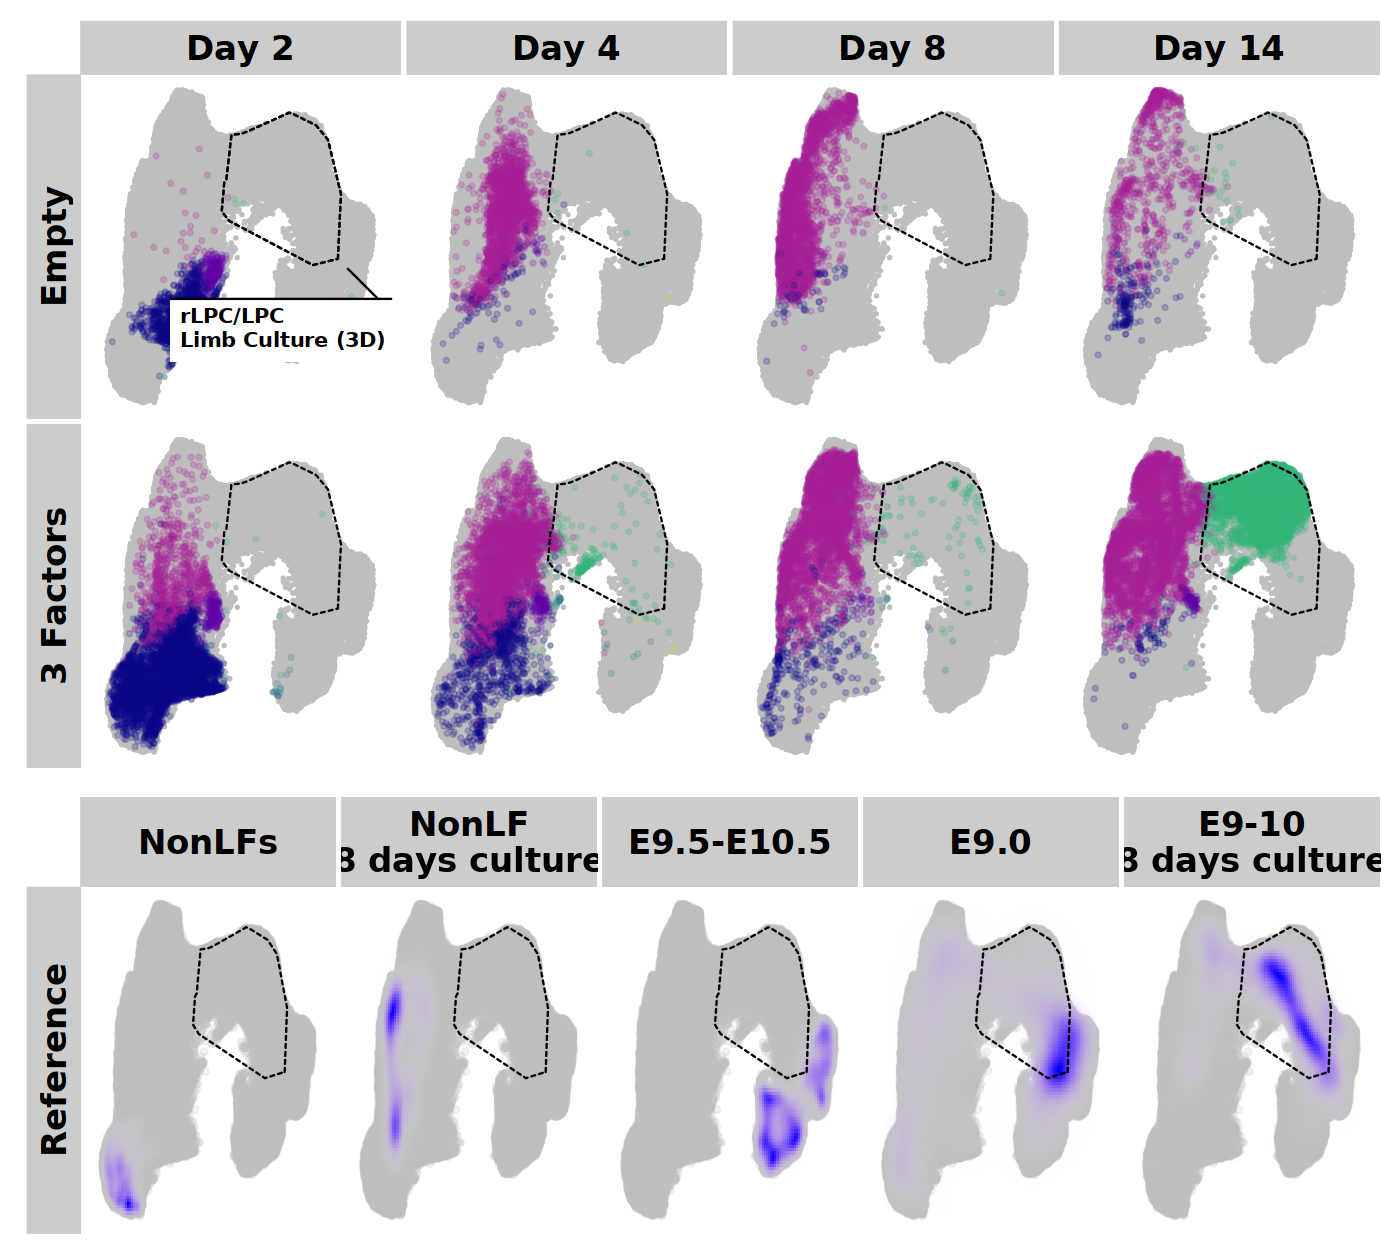

In [18]:
options(repr.plot.width=7/3*5, repr.plot.height=10.5)

p.update   <- p2 / p1.density + plot_layout( heights = c(2,1) )

p.update

In [19]:
# ggsave("./figures/Figure3A(right)_updated.png", plot = p.update, width=7/3*6, height=10.5)

## Figure 3B (left)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another sc

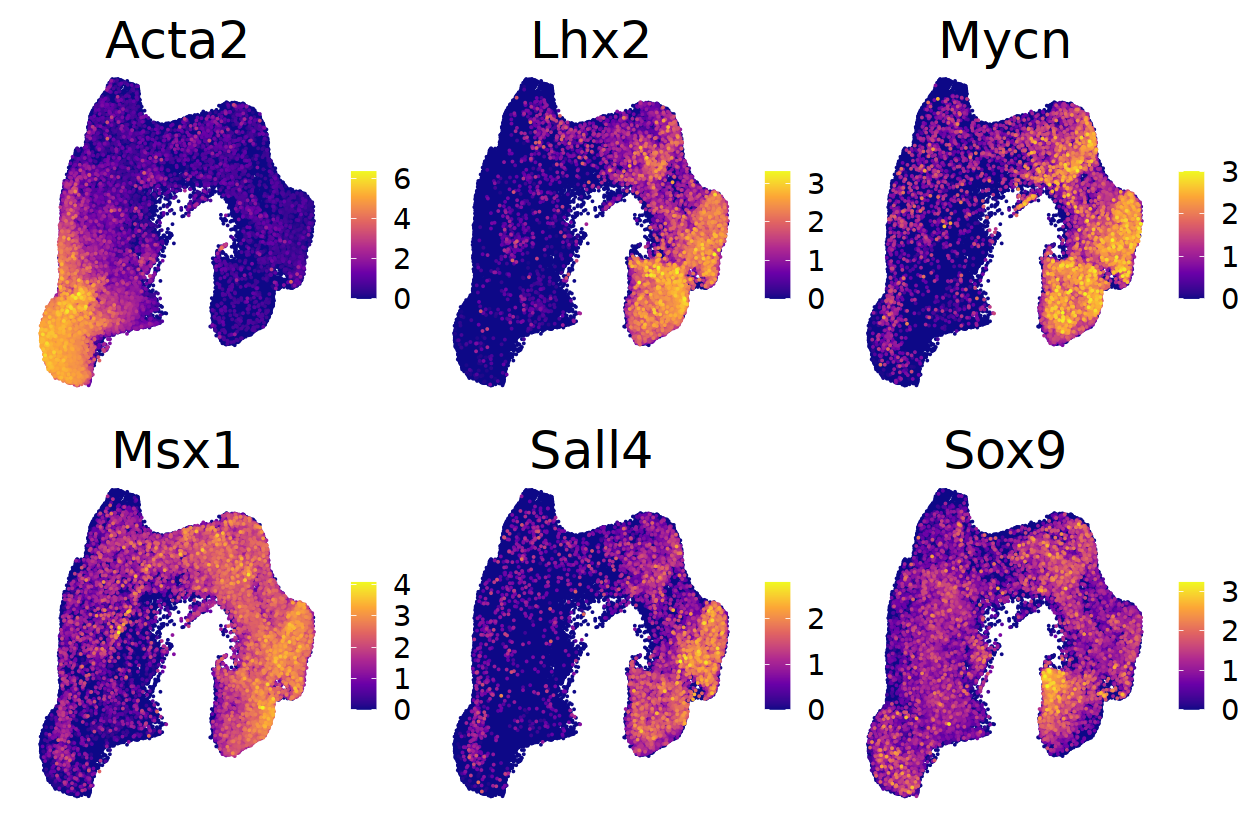

In [20]:
DefaultAssay( integrated ) <- "RNA"

Fig3B <-
FeaturePlot(
  integrated,
  features = c("Acta2", "Lhx2", "Mycn", "Msx1", "Sall4", "Sox9"),
#  split.by = "batch2"
  order = T,
  ncol = 3,
  combine = T
#  pt.size = 0.5
) &
  scale_colour_viridis_c( option = "C" ) &
  theme(
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text( size = 20 ),
    plot.title = element_text( size = 30, face="bold.italic", margin=margin(0,0,-10,0) )
  ) &
  scale_x_reverse()
  
options(repr.plot.width=10.5, repr.plot.height=7)
Fig3B

In [21]:
# ggsave("./figures/Figure3B_index88.png", plot = Fig3B, width=10.5, height=7)

## Figure 3C



### Figure 3C left

In [22]:
pseudobulk.list <-
integrated@meta.data %>%
dplyr::filter( integrated_snn_res.0.2 == 2, day3 %in% c("08", "10", "14") ) %>%
dplyr::count( pseudobulk, condition3 ) %>%
group_by( pseudobulk ) %>%
dplyr::filter( n > 50 ) %>%
pull( pseudobulk )

integrated$cLPC_Primary <- with(
    integrated@meta.data,
    case_when(
        condition3 == "cLPC" & day3 %in% c("08", "10", "14") ~ "cLPC",
        condition3 == "cLPC" ~ "cLPC(immature)",
        TRUE ~ condition3
    )
)

In [23]:
DefaultAssay( integrated ) <- "RNA"

tictoc::tic()
sce <- as.SingleCellExperiment( integrated )

sce_subset <- sce[, 
    sce$integrated_snn_res.0.2 == 2 &
    sce$pseudobulk %in% pseudobulk.list &
    sce$condition3 != "Primary",
]
tictoc::toc()

97.035 sec elapsed


In [24]:
require( glmGamPoi )
tictoc::tic()
sce_reduced <- pseudobulk(
    sce_subset, 
    # This is absolutely confusing way to do things because of our experimental design but in the end makes sense
    group_by = vars(
        batch,
        # library,  # library should not be included because it will split 3F-1/3F-2 and inDrop Pos+Neg
        pseudobulk,
        condition3,
        cLPC_Primary
    )
)
tictoc::toc()

Loading required package: glmGamPoi


Attaching package: ‘glmGamPoi’


The following object is masked from ‘package:dplyr’:

    vars


The following object is masked from ‘package:ggplot2’:

    vars


Aggregating assay 'counts' using 'rowSums2'.

Aggregating assay 'logcounts' using 'rowMeans2'.



4.938 sec elapsed


In [25]:
tictoc::tic()
fit_batch <- glm_gp(
    sce_reduced, 
#     design = des,
   design = ~ batch + condition3-1,
    reference_level = "10Xcore"
)
tictoc::toc()

38.287 sec elapsed


In [26]:
tictoc::tic()
de_res <- test_de(
    fit_batch, 
    contrast = 
        cond(
            condition3 = "3F"
        ) - 
        cond( 
            condition3 = "cLPC"
        )
    
)
tictoc::toc()

options( repr.plot.width = 10.5, repr.plot.height = 7 )

# Most different genes
de_res %>% 
dplyr::filter( adj_pval < 0.01 )

# ggplot(de_res, aes(x = lfc, y = -log10(pval))) +
#   geom_point(size = 2, aes(color = adj_pval < 0.01)) +
# labs( title = "3F vs. cLPC", subtitle = "in cluster 2, WITH batch correction, include D3, D4")



0.263 sec elapsed


name pval adj_pval f_statistic df1 df2 lfc

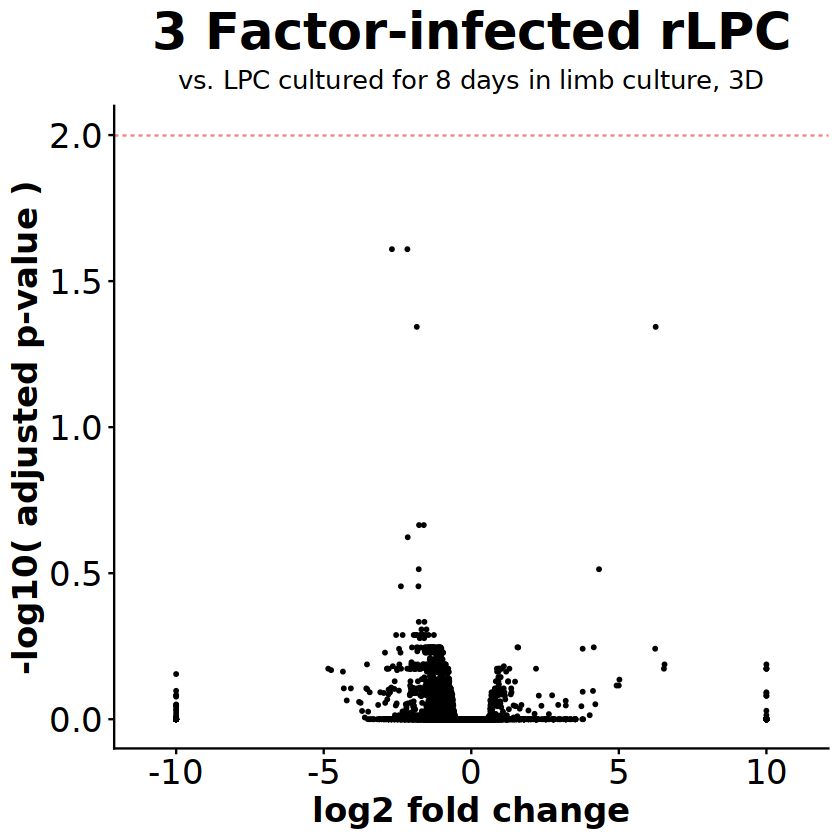

In [27]:
p1 <-
de_res %>%
mutate(
    lfc = ifelse(abs(lfc) > 20, sign(lfc) * Inf, lfc)
) %>% {
    ggplot(., aes(x = lfc, y = -log10(adj_pval))) +
    geom_point(size = 0.6) +
    ggforce::geom_mark_circle(
    data = filter( ., adj_pval < 0.01 ),
    aes( 
      label = name,
      group = name
    ),
    alpha = 1,
    expand = 0.01,
    con.cap = unit(0, "mm"),
    con.type = "elbow",
    con.arrow = arrow( 
      length = unit(1, "mm"),
      ends = "last", 
      type = "closed" 
    ),
    label.buffer = unit(2, 'mm'),
    label.margin = margin(0.5, 0.5, 0.5, 0.5, "mm"),
    label.fontsize = 20,
    label.fontface = "italic",
    label.fill = NA
    ) +
    geom_hline( yintercept = -log10(c(0.01)), colour = "salmon", linetype = "dashed" ) +
    labs(
        title = "3 Factor-infected rLPC",
        subtitle = "vs. LPC cultured for 8 days in limb culture, 3D"
    ) +
    cowplot::theme_cowplot() +
    labs( y = "-log10( adjusted p-value )" ) +
    theme(
        axis.title.y = element_text( size = 20, face = "bold" ) 
    )
}

options( repr.plot.width=7, repr.plot.height=7 )
p <-
(p1) & 
scale_y_continuous( lim = c(0,2) ) &
scale_x_continuous( lim = c( -11, 11) ) &
labs( x = "log2 fold change" ) &
theme(
    plot.title    = element_text( size = 30, face = "bold", hjust = 0.5 ),
    plot.subtitle = element_text( size = 15, hjust = 0.5 ),
    axis.title.x  = element_text( size = 20, face = "bold" ),
    axis.text     = element_text( size = 20 )
)

p

In [28]:
# ggsave("figures/Figure3Cl.png", plot = p, width = 7, height = 7 )

### Figure 3C inset

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in ggplot2 3.3.4.
ℹ Please use "none" instead.”


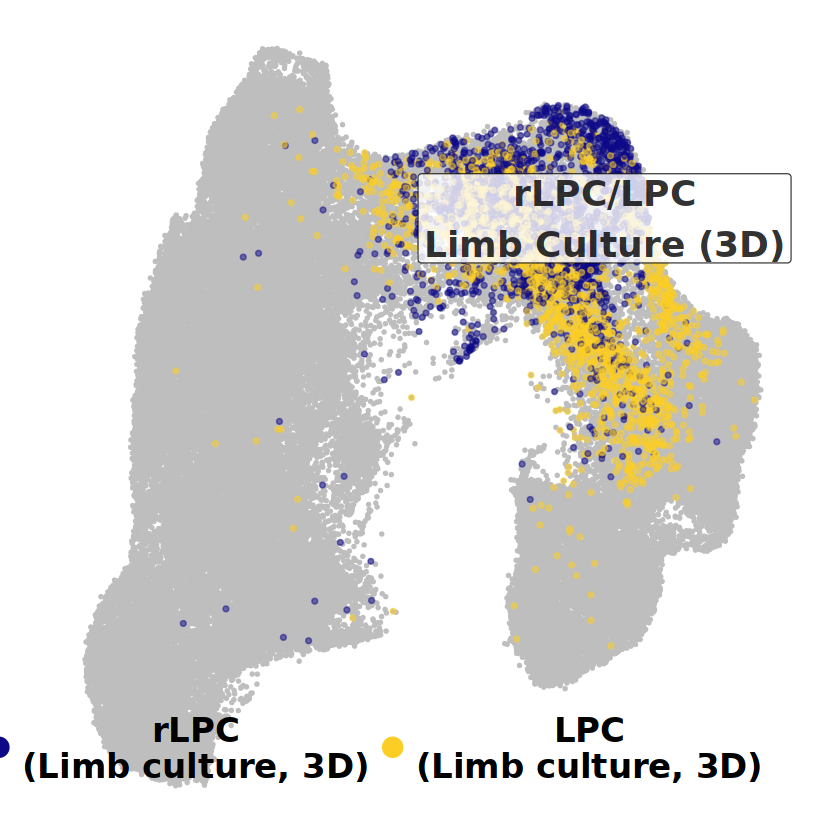

In [29]:
integrated$treatment <- with(
    integrated@meta.data,
    case_when(
        condition3 %in% c("3F")  ~ "rLPC\n(Limb culture, 3D)",
        condition3 %in% c("cLPC") ~ "LPC\n(Limb culture, 3D)",
        TRUE ~ as.character(NA)
    )
)

integrated$treatment <- factor( integrated$treatment, levels = c("rLPC\n(Limb culture, 3D)", "LPC\n(Limb culture, 3D)") )

p1.inset <-
ggplot() +
  geom_point( 
    data=FetchData( integrated, vars = c("UMAP_1", "UMAP_2"  ) ),
    aes(x = UMAP_1, y = UMAP_2),
    size = 0.5,
    colour = "grey"
  ) +
  geom_point( 
    data=FetchData( 
            integrated, 
            vars = c("UMAP_1", "UMAP_2", "treatment", "integrated_snn_res.0.2"  ) 
    ) %>% 
    filter( integrated_snn_res.0.2 == 2, !is.na(treatment) ) %>%
    group_by( treatment ) %>%
    dplyr::arrange( sample(1:n()) ) %>%
    filter( row_number() <= 2000 ),
    aes(x = UMAP_1, y = UMAP_2, colour = treatment),
    size = 1,
    alpha = 0.5
  ) +
  ggrepel::geom_label_repel(
    data=FetchData(
            integrated,
            vars = c("UMAP_1", "UMAP_2", "label.0.2", "integrated_snn_res.0.2" )
        ) %>%
        filter( integrated_snn_res.0.2 == 2 ) %>%
        group_by( label.0.2 ) %>%
        summarize(
            across(
                UMAP_1:UMAP_2,
                ~mean(.x)
            )
        ) %>%
        mutate(
            label.0.2.reannotated = "rLPC/LPC\nLimb Culture (3D)"
        )
      ,
    aes( 
      x = UMAP_1, 
      y = UMAP_2, 
      label = label.0.2.reannotated
    ),
    size = 7.5,
    fontface = "bold",
    alpha = 0.8
  ) +
  cowplot::theme_cowplot() +
  scale_x_reverse( expand = expansion(0.1, 0 ) ) +
#  scale_x_continuous( expand = expansion(0.1, 0)) +
  scale_colour_viridis_d( 
      option = "C", 
      end = 0.9 
  ) +
  scale_fill_manual( 
    guide = FALSE,
    values = c( "white", "gold" )
  ) +  
  guides(
    color = guide_legend(
      override.aes =
        list(
          size=5,
          alpha = 1.0
        ),
      ncol= 4,
      byrow = T
    )
  ) +
  theme( 
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    axis.line    = element_blank(),
#    legend.position = "right",
    legend.position = c(0.5, 0.1), 
    legend.justification = c("center", "center"),
#    legend.box.just = "center",
    legend.title = element_blank(),
    legend.text  = element_text( size = 20, face = "bold" ),
    legend.text.align = 0.5
  )


# https://stackoverflow.com/questions/25100038/ggplot2-center-legend-below-plot-instead-of-panel-area
#p2 <- p1.inset + theme( legend.position = "none" ) 
#le1 <- cowplot::get_legend(p1.inset)

options( repr.plot.width=7, repr.plot.height=7 )

p1.inset

#cowplot::plot_grid(p2, le1, nrow = 2, rel_heights = c(1, 0.2))




In [30]:
# ggsave("figures/Figure3C_inset.png", plot = p1.inset, width = 7, height = 7 )

# Figure S3

## Figure S3F

In [31]:
color.mapping.res.0.2

cluster.mapping.res.0.2 <- purrr::map_chr( color.mapping.res.0.2, ~gsub("\n", " ", .x))

cluster.mapping.res.0.2

3                              6 
"NonLF\nStandard Culture (2D)"     "NonLF\nLimb Culture (2D)" 
                             1                              2 
    "NonLF\nLimb Culture (3D)"  "rLPC/LPC\nLimb Culture (3D)" 
                             5                              4 
                    "LPC (E9)"                    "LPC (E10)"

3                             6 
"NonLF Standard Culture (2D)"     "NonLF Limb Culture (2D)" 
                            1                             2 
    "NonLF Limb Culture (3D)"  "rLPC/LPC Limb Culture (3D)" 
                            5                             4 
                   "LPC (E9)"                   "LPC (E10)"

In [32]:
DefaultAssay( integrated ) <- "RNA"

df <-
FetchData( 
    integrated, 
    vars = c(
        "integrated_snn_res.0.2",
        "free.annotation2",
        "pseudobulk",
        "condition3",
        "day3",
        "label.0.2"
    )
) %>% dplyr::filter( condition3 %in% c("Primary", "cLPC", "3F", "0F") ) %>%
mutate(
    # condition3 is too broad term for primaries
    condition4 = case_when(
        condition3 == "Primary" & grepl("Limb", free.annotation2 ) ~ "E9.0",
        condition3 == "Primary" & grepl("E9", free.annotation2 ) ~ "E9.5",
        condition3 == "Primary" & grepl("E10\\.5", free.annotation2 ) ~ "E10-E10.5",
#        condition3 == "Primary" & grepl("E10", free.annotation2 ) ~ "E10",
        condition3 == "Primary" & grepl("E10", free.annotation2 ) ~ "E10-E10.5",
        condition3 == "cLPC" ~ "cultured LPCs",
        condition3 == "0F" ~ "Empty",
        condition3 == "3F" ~ "3 Factors",
        TRUE ~ condition3
    ),
    condition4 = factor(
        condition4,
        levels = c(
            "Empty",
            "3 Factors",
            "cultured LPCs",
            "E9.0",
            "E9.5",
            "E10-E10.5"
        )
    ),
    day4 = factor( as.integer(day3), levels = c(0, 2, 3, 4, 8, 10, 14) ),
    condition5 = case_when(
        condition3 == "Primary" ~ "cultured LPCs",
        condition3 == "cLPC" ~ "cultured LPCs",
        condition3 == "0F" ~ "Empty",
        condition3 == "3F" ~ "3 Factors"
    ),
    condition5 = factor( 
        condition5,
        levels = c(
            "Empty",
            "3 Factors",
            "cultured LPCs"
        )
    )
) %>%
dplyr::filter( condition4 %ni% c("E9.0") ) %>%
dplyr::count( condition5, condition4, condition3, day4, pseudobulk, label.0.2 ) %>%
group_by( condition5, condition4, day4, pseudobulk ) %>%
mutate(
    fraction = n / sum(n),
    cluster.total = sum(n)
) %>%
dplyr::select( -n ) %>%
pivot_wider( names_from = label.0.2, values_from = `fraction`, values_fill = 0 ) %>%
dplyr::filter( cluster.total > 50 ) 

p <- list()

for (i in 1:6) {
    p[[paste0(cluster.mapping.res.0.2[i], " cluster")]] <-
    df %>%
    ggplot( aes( x = day4, y = !!sym(color.mapping.res.0.2[i]), colour = condition4 ) ) +
    geom_boxplot() +
    ggbeeswarm::geom_beeswarm() +
    scale_y_continuous( label = scales::percent, expand = expansion( add = c(0,0), mult = c(0, 0.01)) ) +
    facet_wrap( condition5 ~ . ) +
    labs(
        title = glue::glue("cluster {cluster.mapping.res.0.2[i]} fraction"),
        x = "days after infection/culture",
        colour = "experimental group"
    ) +
    theme(
        plot.title = element_text( size = 7 ),
        axis.title = element_text( size = 7 ),
        axis.text = element_text( size = 7 ),
        strip.text.x.top  = element_text(angle = 0, size = 7)
    )
}



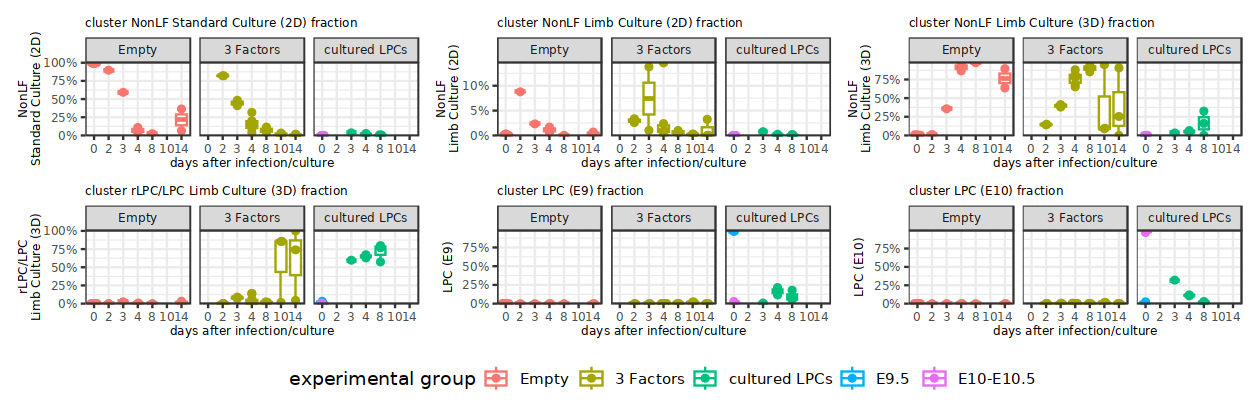

In [35]:
options( repr.plot.width = 10.5, repr.plot.height = 3.5 )

FigS3F <- purrr::reduce( p, ~.x + .y ) + plot_layout(guides = "collect") & theme( legend.position = "bottom" )
FigS3F

In [ ]:
# ggsave("./figures/FigureS10A.png", plot = FigS10A, width=10.5, height=3.5)

## Figure S3G

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x,

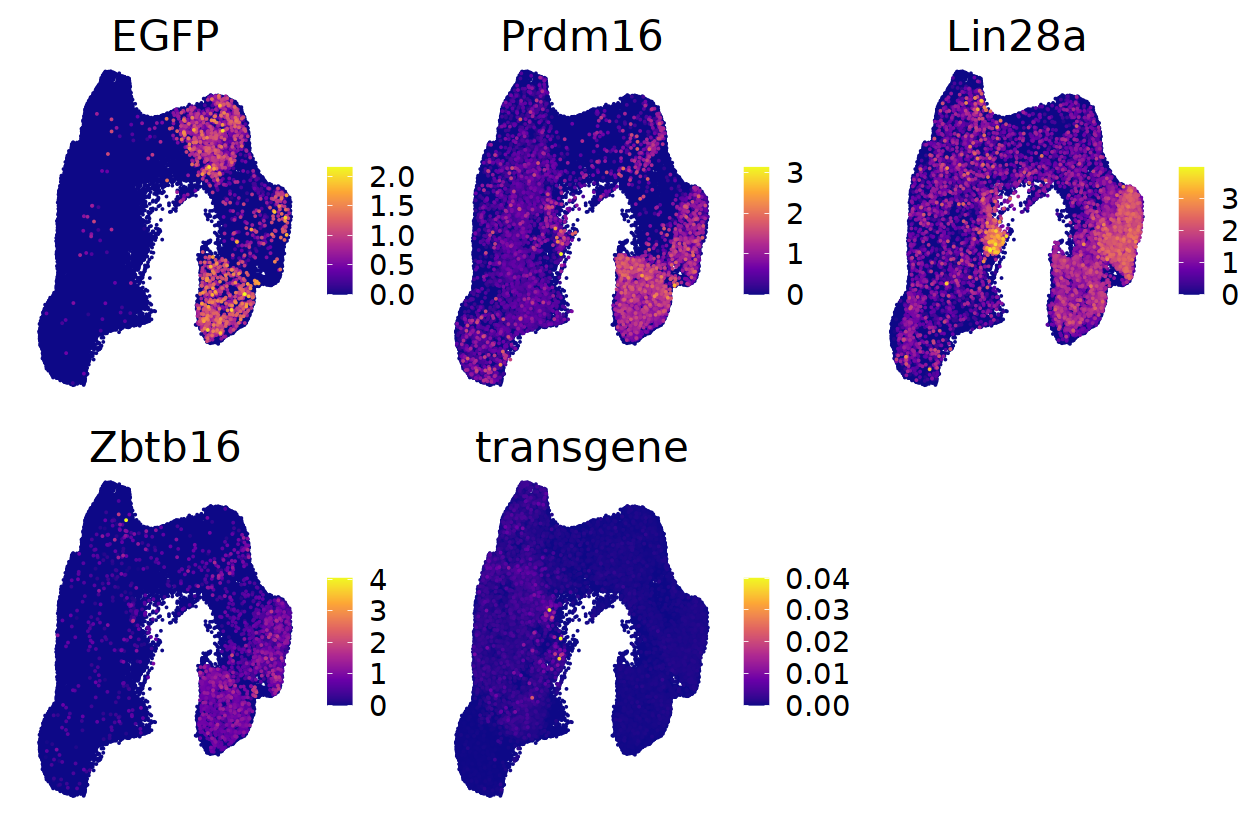

In [37]:
integrated$percent.transgenes <- ifelse( is.na(integrated$percent.transgenes), 0, integrated$percent.transgenes)

#singlet <- schex::make_hexbin(singlet, nbins = 50, dimension_reduction = "umap")

integrated$transgene <- integrated$percent.transgenes

DefaultAssay( integrated ) <- "RNA"

FigS3G <-
FeaturePlot(
  integrated,
  features = c("EGFP", "Prdm16", "Lin28a", "Zbtb16", "transgene"),
  order = T,
#  pt.size = 0.5,
  ncol = 3
) &
scale_colour_viridis_c( option = "C" ) &
scale_x_reverse() &
theme(
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text( size = 20 ),
    plot.title = element_text( size = 25, face="bold.italic", margin=margin(0,0,-10,0) )
)


options(repr.plot.width=10.5, repr.plot.height=7)
FigS3G



In [38]:
# ggsave("./figures/FigureS3G.png", plot = FigS3G, width=10.5, height=7)

## Figure S3H

`summarise()` has grouped output by 'condition3', 'day3', 'pseudobulk'. You can override using the `.groups` argument.


condition3 day3 pseudobulk     positive.1 positive.2  positive.3 
1 3F         10   3F-Bar19       0.9927536  0.007246377 0.000000000
2 3F         10   3F-Bar20       0.9624060  0.037593985 0.000000000
3 3F         14   HA1-bulk       0.8481142  0.145769623 0.006116208
4 3F         14   rerepr_5-bulk  0.5724563  0.315519013 0.112024666
5 cLPC       08   3FD08-3-bulk   0.9403579  0.053677932 0.005964215
6 cLPC       08   matrigel1-bulk 0.9027903  0.091809181 0.005400540
7 cLPC       08   matrigel2-bulk 0.9346591  0.065340909 0.000000000

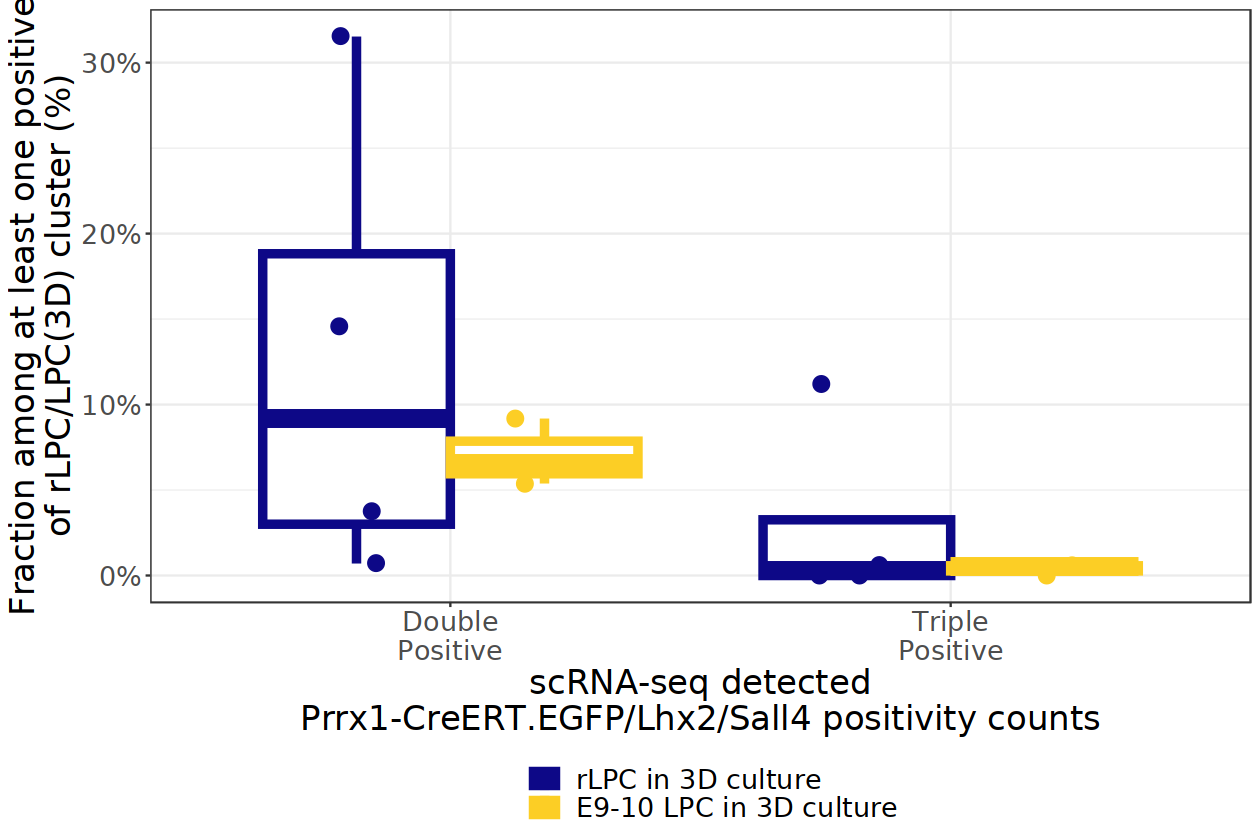

In [39]:
df <-
FetchData(
    integrated,
    vars = c("condition3", "pseudobulk", "day3", "integrated_snn_res.0.2", "Sall4", "Lhx2", "EGFP", "TDTOMATO", "library")
) %>% 
filter( integrated_snn_res.0.2 == 2, condition3 %in% c("cLPC", "3F"), day3 %in% c("08", "10", "14") ) %>%
dplyr::count( condition3, day3, pseudobulk, Sall4 > 0, Lhx2 > 0, (EGFP > 0 | TDTOMATO > 0) ) %>%
mutate(
    positive = `Sall4 > 0` + `Lhx2 > 0` + `(EGFP > 0 | TDTOMATO > 0)`,
) %>%
complete( condition3, day3, pseudobulk, positive, fill = list(n = 0)) %>%
dplyr::select( condition3, day3, pseudobulk, positive, n ) %>%
dplyr::group_by( condition3, day3, pseudobulk ) %>%
dplyr::filter( positive > 0 ) %>%
dplyr::filter( sum(n) > 50 ) %>%
group_by( condition3, day3, pseudobulk, positive ) %>%  # There are multiple kinds of single/double/triple positivity
summarize(
    n = sum(n)
) %>%
group_by( condition3, day3, pseudobulk ) %>%
mutate(
    fraction = n / sum(n)
) %>%
dplyr::select( -n )

# Show the values
df %>%
pivot_wider( names_from = positive, names_prefix = "positive.", values_from = fraction )

# Visualization
dodge_with <- 0.75

SFig3H <-
df %>%
mutate(
    label = case_when(
        condition3 == "cLPC" ~ "E9-10 LPC in 3D culture",
        condition3 == "Primary" ~ "E9-10 LPC",
        condition3 == "3F" ~ "rLPC in 3D culture"
    ),
    label = factor( label, levels = c("rLPC in 3D culture", "E9-10 LPC", "E9-10 LPC in 3D culture" )),
    positive2 = case_when(
#        positive == 0 ~ "Negative (not found)",
        positive == 2 ~ "Double\nPositive",
        positive == 3 ~ "Triple\nPositive",
        TRUE ~ "Single\nPositive"
    )
) %>%
dplyr::filter(
    positive != 1
) %>% {
ggplot( ., aes( x = positive2, y = fraction, colour = label) ) +
geom_boxplot( position = position_dodge(width = dodge_with), outlier.shape = NA, size = 2) +
# ggbeeswarm::geom_quasirandom(
#     groupOnX = T, 
#     position = position_dodge(width = dodge_with) 
# ) +
geom_point( position = position_jitterdodge(), size = 4 ) +
scale_y_continuous( label = scales::percent ) +
labs(
    x = "scRNA-seq detected\nPrrx1-CreERT.EGFP/Lhx2/Sall4 positivity counts",
    y = "Fraction among at least one positive\nof rLPC/LPC(3D) cluster (%)"
) +
scale_colour_viridis_d( 
    option = "C", 
    end = 0.9
) +
guides(
    colour = guide_legend(ncol = 1)
) +
theme(
    legend.position = "bottom",
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
#     axis.title = element_blank(),
#     axis.ticks = element_blank(),
#     axis.text = element_blank(),
    text = element_text( size = 20 ),
    legend.title = element_blank(),
    plot.title = element_text( size = 30, face="bold.italic", margin=margin(0,0,-10,0) )
)
}

SFig3H

In [40]:
# ggsave("./figures/FigureS10C(right)_updated.png", plot = SFig10C.updated, width=10.5, height=7)

## Figure S3I

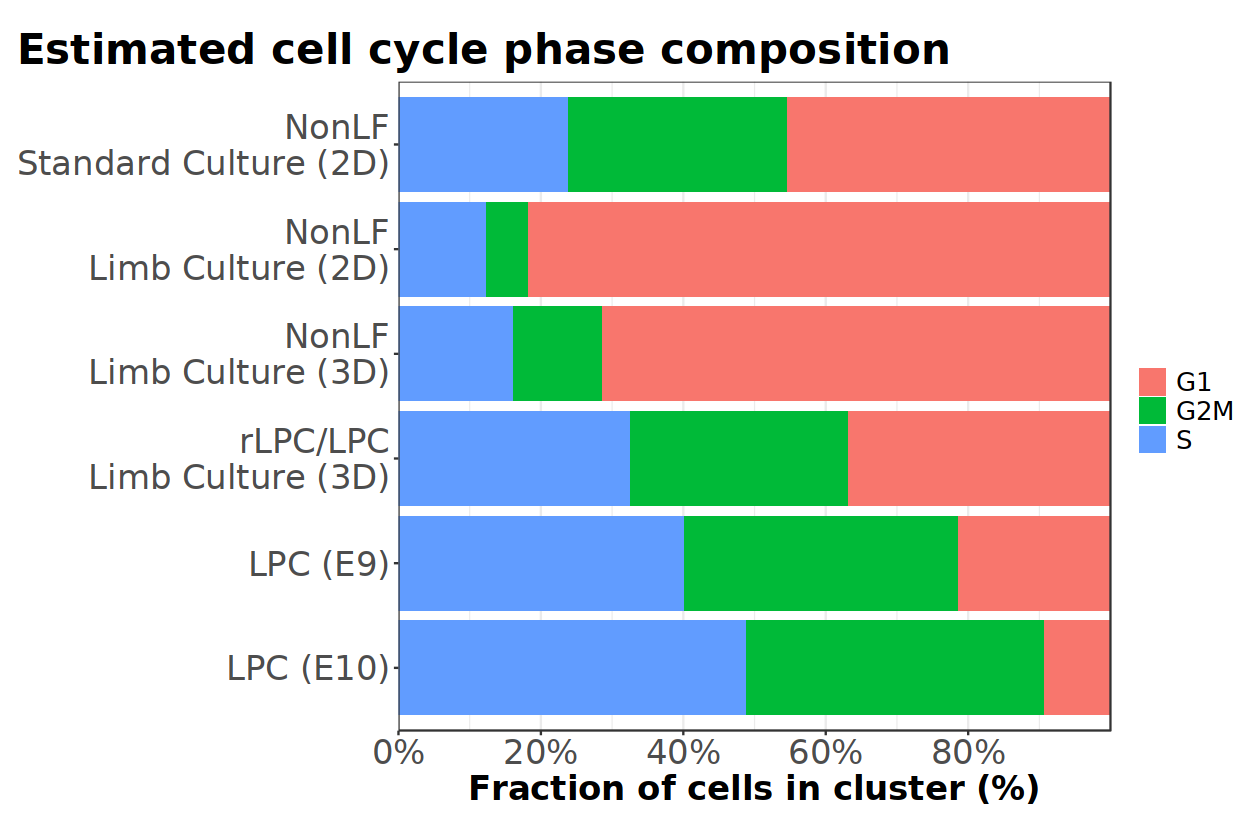

In [44]:
FigS3I <-
FetchData(
    integrated,
    vars = c("label.0.2", "Phase" )
) %>%
mutate(
    label.0.2 = factor( 
        label.0.2,
        levels = rev(c(
            "NonLF\nStandard Culture (2D)",
            "NonLF\nLimb Culture (2D)",
            "NonLF\nLimb Culture (3D)",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC (E9)",
            "LPC (E10)"
        ))
    )
) %>%
dplyr::count( label.0.2, Phase ) %>%
group_by( label.0.2 ) %>%
mutate( fraction = n / sum(n) ) %>%
ggplot( aes( x = label.0.2, y = fraction, fill = Phase) ) +
geom_bar( stat = "identity" ) +
scale_y_continuous(
    name = "Fraction of cells in cluster (%)",
    label = scales::percent,
    expand = c(0,0),
    breaks = c(0, 0.2, 0.4, 0.6, 0.8)
) +
ggtitle( "Estimated cell cycle phase composition" ) +
coord_flip() +
theme( 
    plot.title.position = "plot", plot.margin = margin(20, 10, 20, 10),
    legend.position = "right",
    legend.title = element_blank(),
#    legend.title = element_text( size = 20, face = "bold"),
    legend.text  = element_text( size = 15 ),
    axis.title.y = element_blank(),
    plot.title   = element_text( size = 25, face = "bold" ),
    axis.text.y  = element_text( size = 20, hjust = 1 ),
    axis.title.x = element_text( size = 20, face = "bold" ),
    axis.text.x  = element_text( size = 20 )
)

FigS3I

In [45]:
# ggsave("./figures/FigureS3I.png", plot = FigS3I, width=10.5, height=7)

## Figure S3J

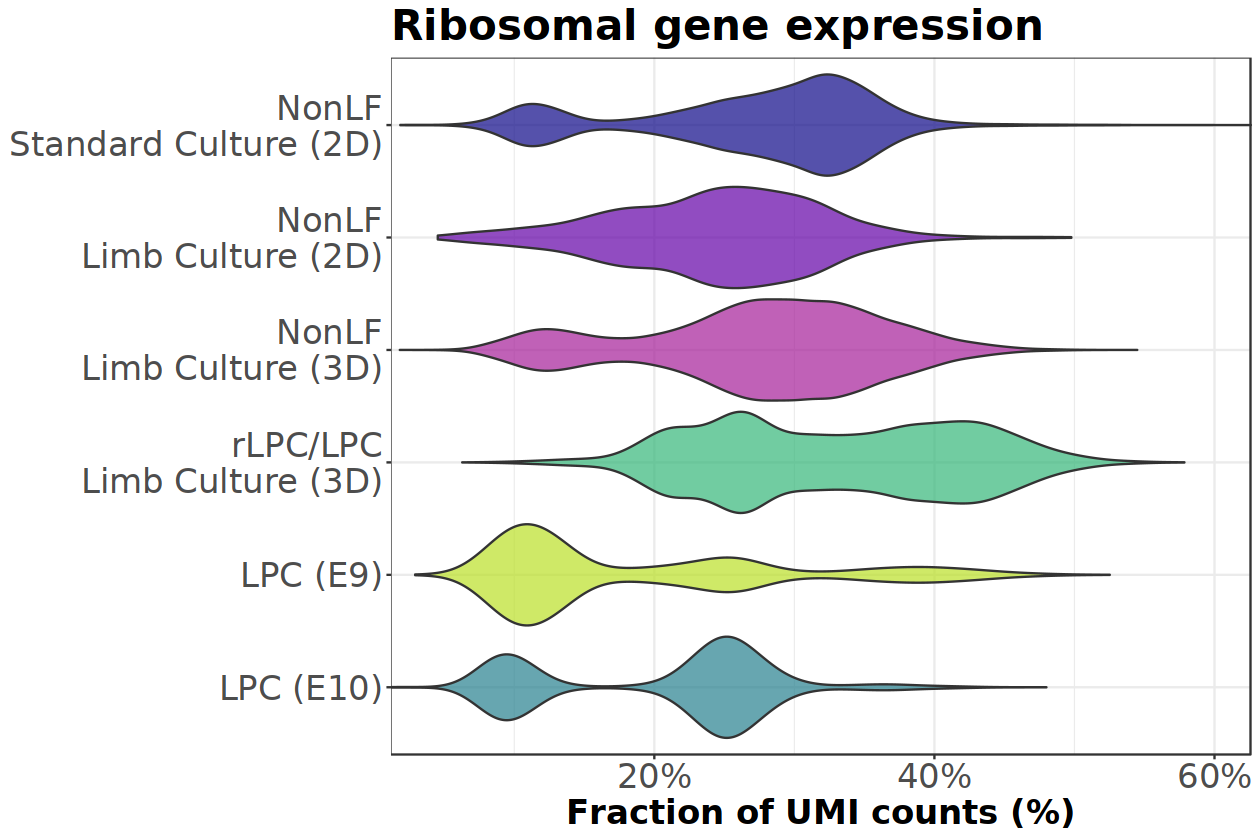

In [42]:
FigS3J <-
FetchData(
    integrated,
    vars = c("label.0.2", "percent.ribo", "S.Score", "G2M.Score")
) %>%
mutate(
    label.0.2 = factor( 
        label.0.2,
        levels = rev(c(
            "NonLF\nStandard Culture (2D)",
            "NonLF\nLimb Culture (2D)",
            "NonLF\nLimb Culture (3D)",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC (E9)",
            "LPC (E10)"
        ))
    )
) %>%
ggplot( aes( x = label.0.2, y = percent.ribo, fill = label.0.2) ) +
geom_violin( scale = "width" ) +
scale_y_continuous( 
    name = "Fraction of UMI counts (%)", 
    label = scales::percent,
    expand = c(0,0)
) +
#scale_fill_viridis_d( option = "C", begin = 0.9, end = 0 ) +
scale_fill_manual(
  values = c(
#           cluster.order   # Somehow scale_colour_manual does not work with a variable!
        "NonLF\nStandard Culture (2D)" = viridis.color[1],
        "NonLF\nLimb Culture (2D)" = viridis.color[2],
        "NonLF\nLimb Culture (3D)" = viridis.color[3],
#            "3" = viridis.color[4],
        "rLPC/LPC\nLimb Culture (3D)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
#            "5" = viridis.color[5],
        "LPC (E9)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
#            "2" = viridis.color[6]
        "LPC (E10)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
      )
) +
coord_flip() +
ggtitle( "Ribosomal gene expression" ) +
theme( 
    legend.position = "none",
    axis.title.y = element_blank(),
    plot.title   = element_text( size = 25, face = "bold", hjust = 0 ),
    axis.text.y  = element_text( size = 20, hjust = 1 ),
    axis.title.x = element_text( size = 20, face = "bold" ),
    axis.text.x  = element_text( size = 20 )
)

options( repr.plot.width = 10.5, repr.plot.height = 7 )
FigS3J

In [43]:
# ggsave("./figures/FigureS3J.png", plot = FigS3J, width=10.5, height=7)

## Figure S3K

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


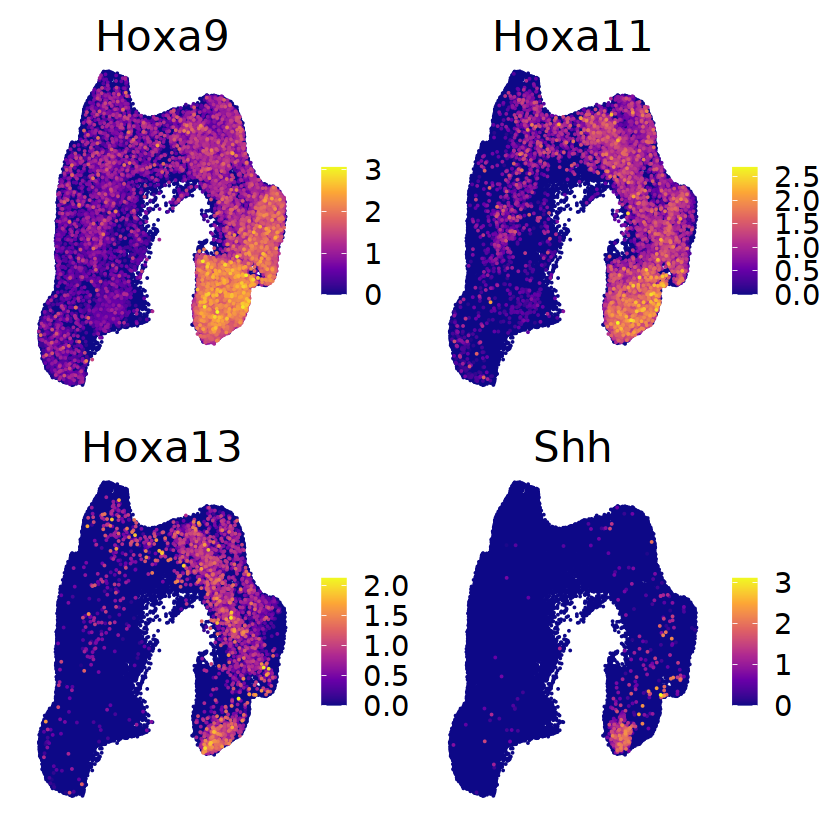

In [46]:
FigS3K <-
FeaturePlot(
  integrated,
  features = c("Hoxa9", "Hoxa11", "Hoxa13", "Shh"),
  order = T
) &
scale_colour_viridis_c( option = "C" ) &
scale_x_reverse() &
theme(
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text( size = 20 ),
    plot.title = element_text( size = 25, face="bold.italic", margin=margin(0,0,-10,0) )
)


options(repr.plot.width=7, repr.plot.height=7)
FigS3K



In [47]:
# ggsave("./figures/FigureS3K.png", plot = FigS3K, width=7, height=7)